In [1]:
import numpy as np
from scipy.stats import kurtosis, skew
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aug 4 2018.csv', header=None)
df.columns = ['seq1', 'start1', 'end1', 'res1', 'chain1', 'pdb1', 'seq2', 'start2', 'end2', 'res2', 'chain2', 'pdb2', 'rms', 'occ' , 'count']

In [3]:
df.head()

seq1  start1  end1  res1 chain1  pdb1       seq2  start2  end2  res2  \
0  ALAASNLYS     683   685  1.94      A  4Y03  ALAASNLYS     362   364  3.20   
1  ALAASNLYS     683   685  1.94      A  4Y03  ALAASNLYS     444   446  1.66   
2  ALAASNLYS     683   685  1.94      A  4Y03  ALAASNLYS     362   364  3.20   
3  ALAASNLYS     683   685  1.94      A  4Y03  ALAASNLYS      73    75  2.04   
4  ALAASNLYS     683   685  1.94      A  4Y03  ALAASNLYS     362   364  3.20   

  chain2  pdb2      rms  occ  count  
0      A  4Y3C  2.83927  111      3  
1      A  4Y04  3.59824  111      3  
2      B  4Y3C  2.10710  111      3  
3      A  4Y4V  2.59099  111      3  
4      C  4Y3C  2.99060  111      3

In [4]:
id_rms_df = df.groupby(['seq1'])['rms'].apply(list).to_frame()
id_rms_df = id_rms_df.reset_index()

In [5]:
num_bins = np.arange(0, 3.1, 0.1)
# bins
x_x = np.arange(0, 3.1, 0.1)
y_y = np.arange(0, 30, 10)
# y = [0, 10, 20, 30, 40, 50, 60]

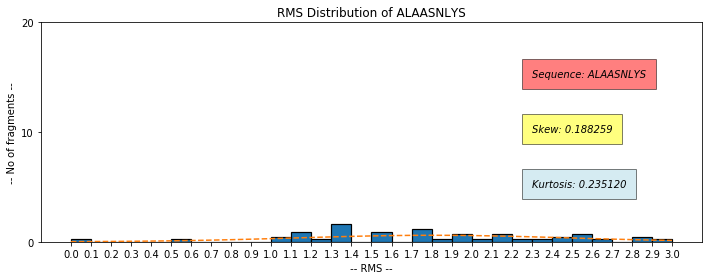

C:\Users\Sudhanva\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sudhanva\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\Sudhanva\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


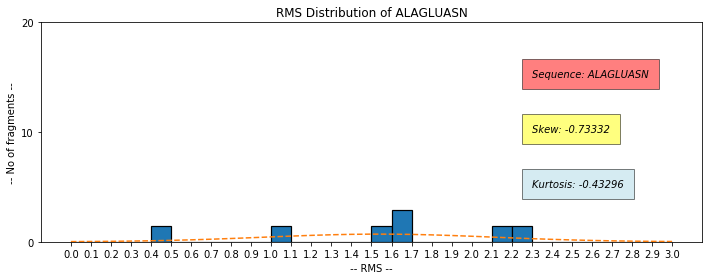

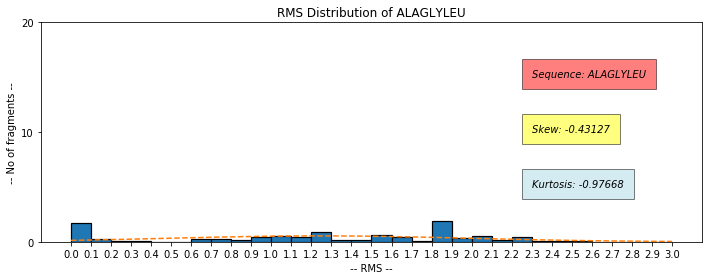

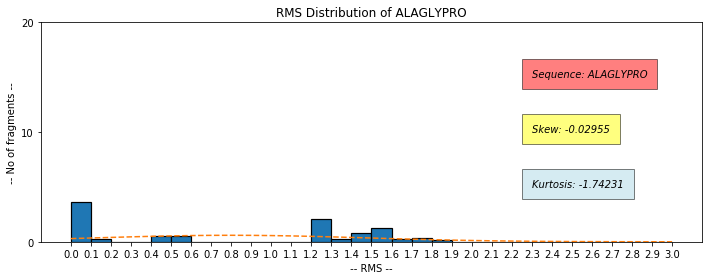

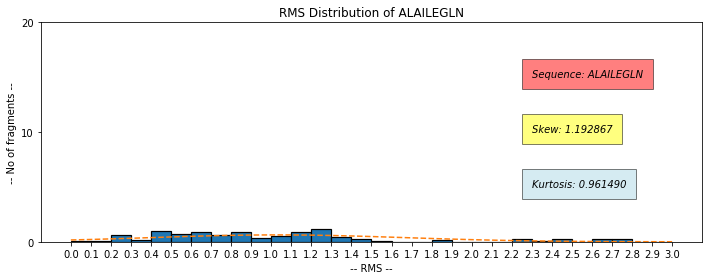

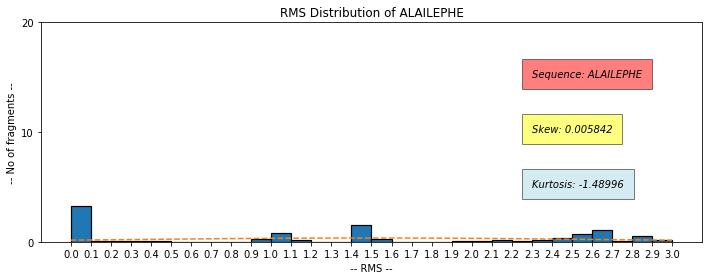

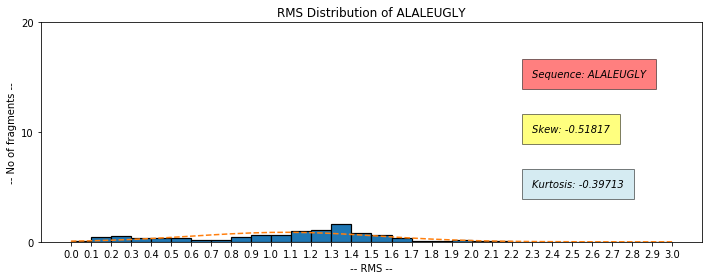

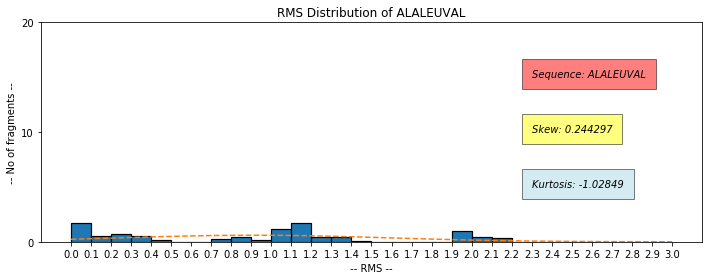

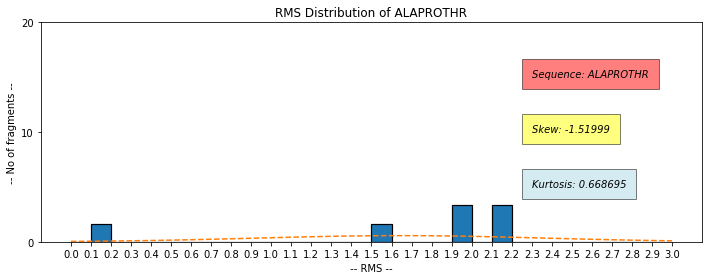

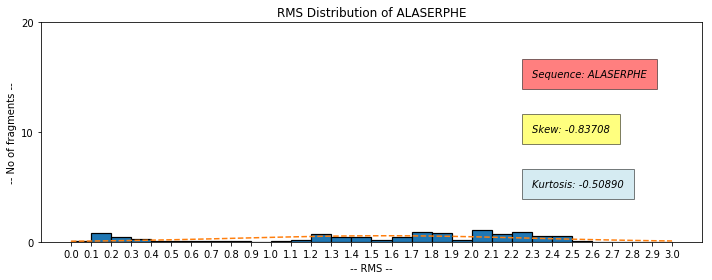

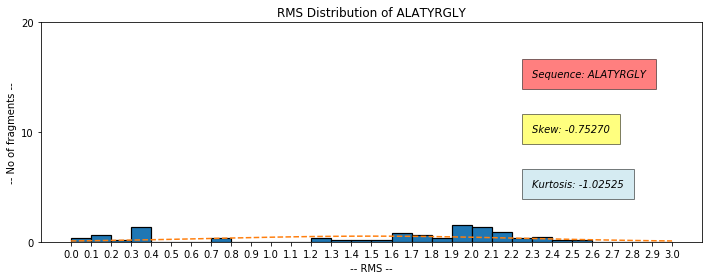

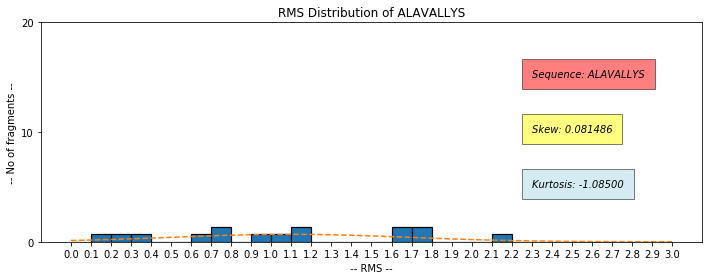

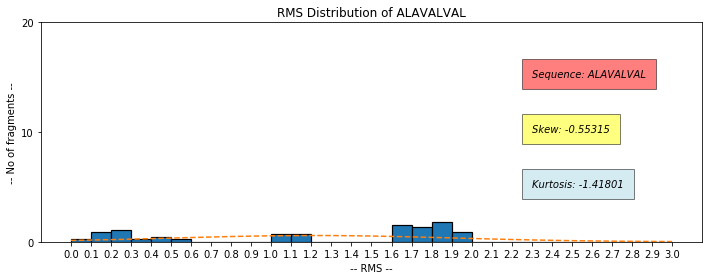

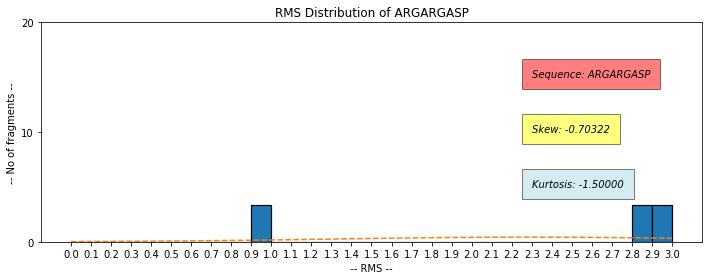

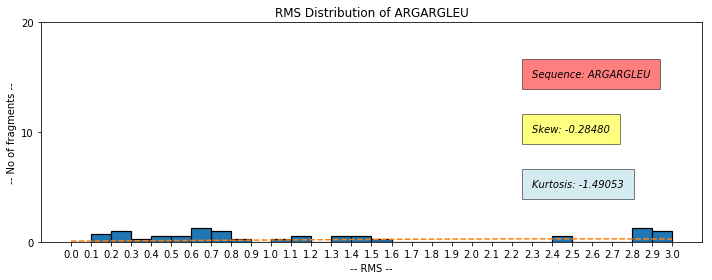

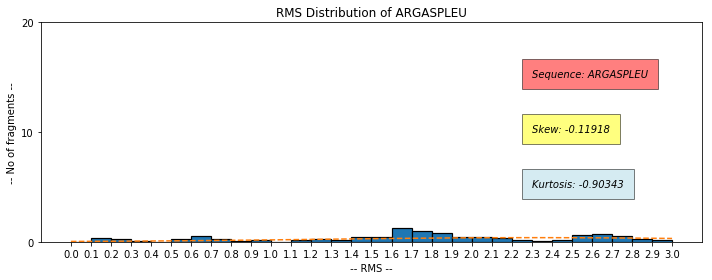

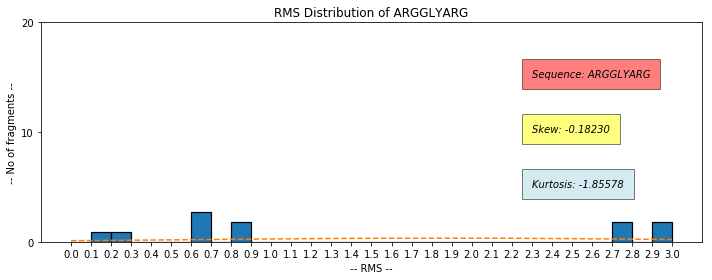

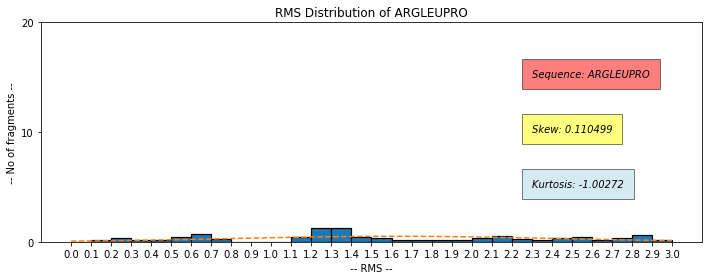

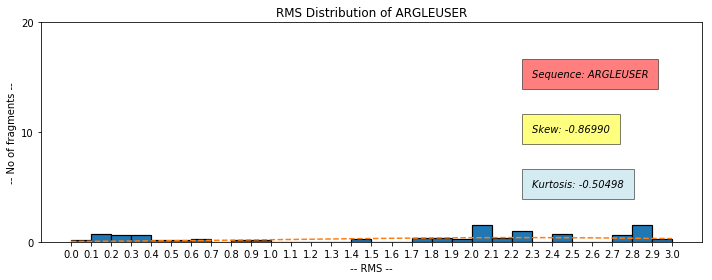

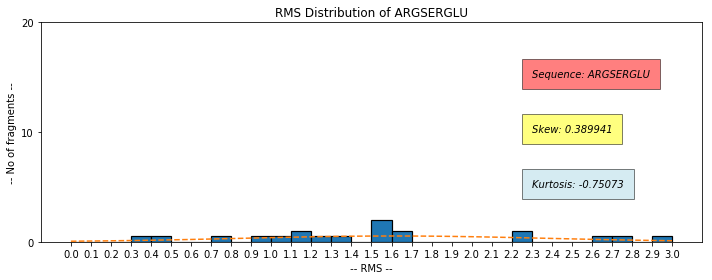

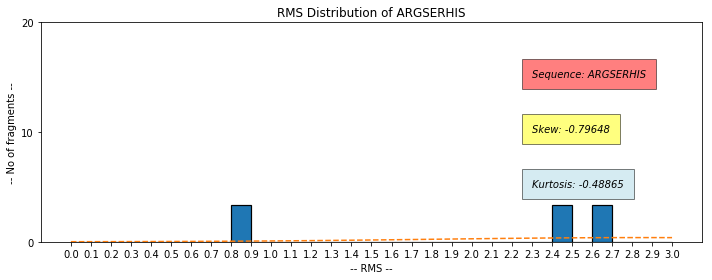

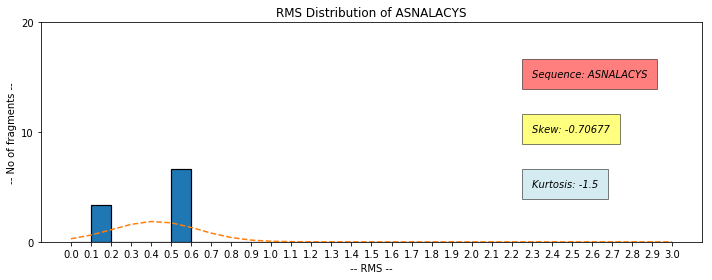

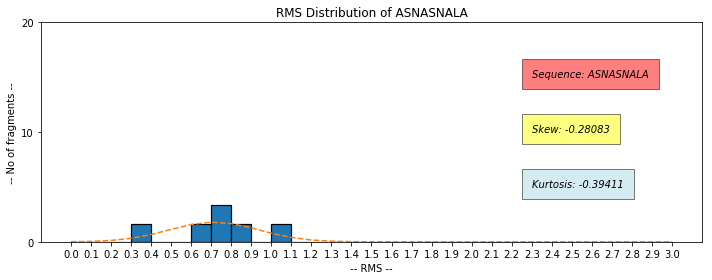

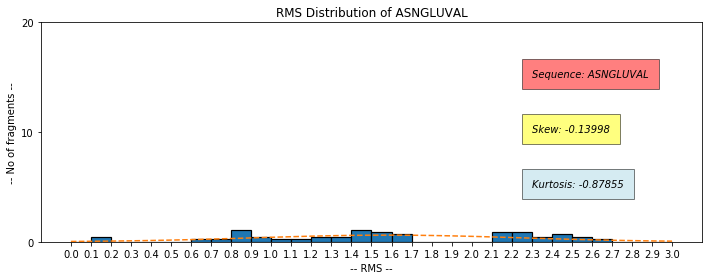

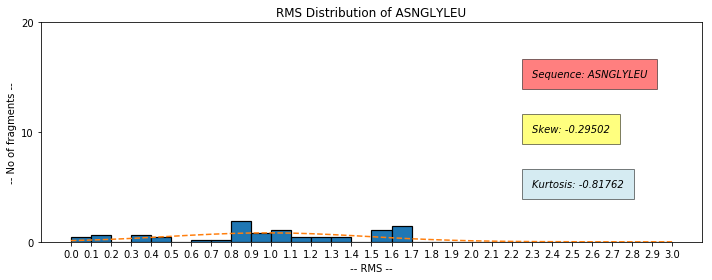

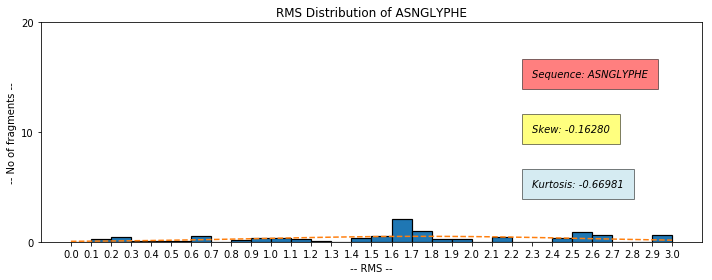

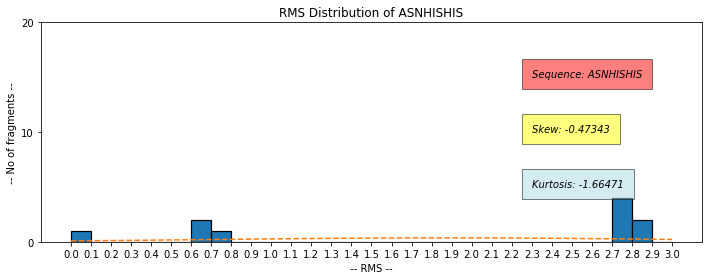

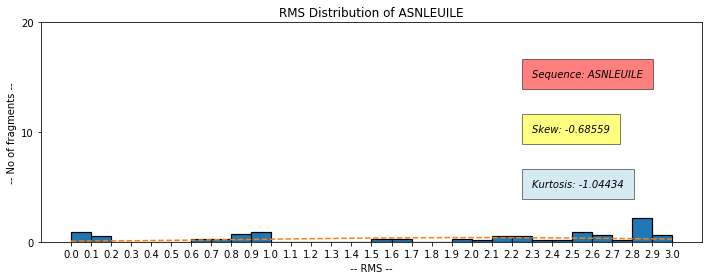

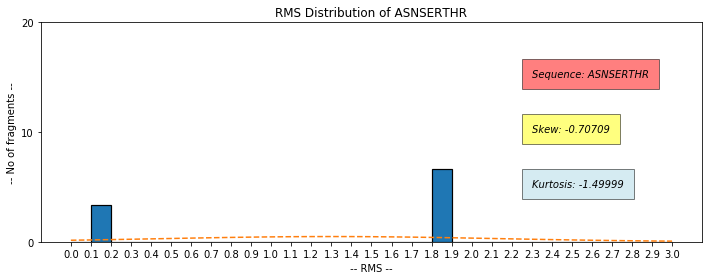

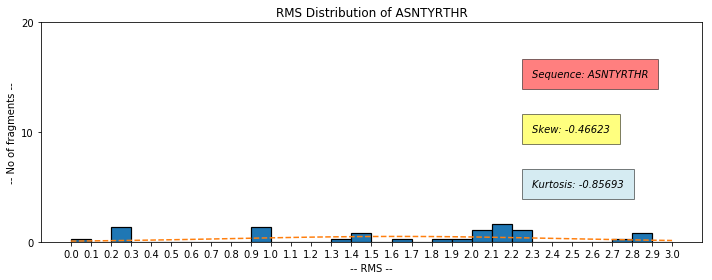

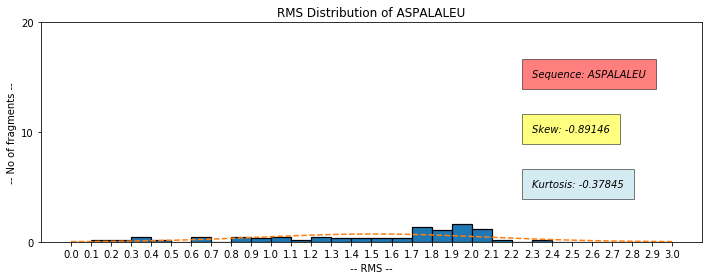

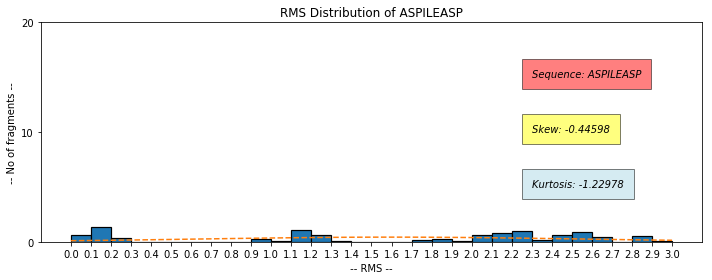

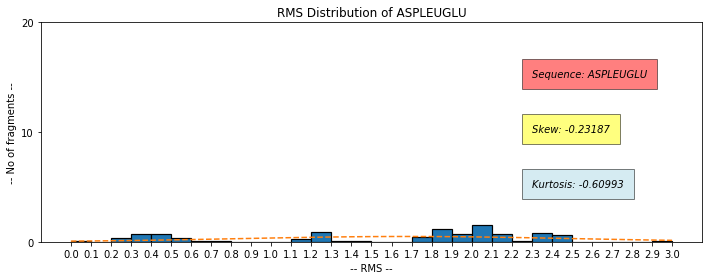

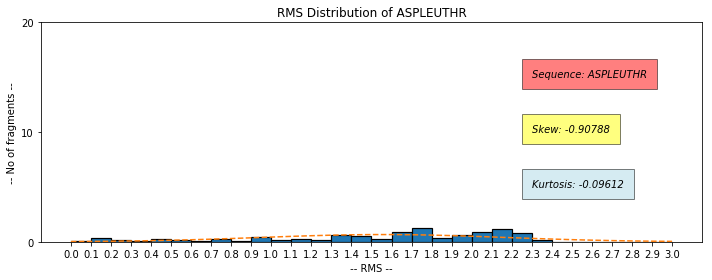

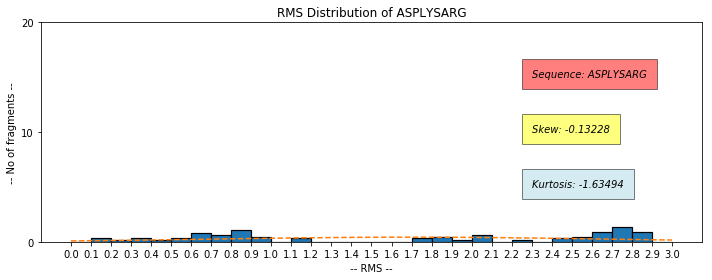

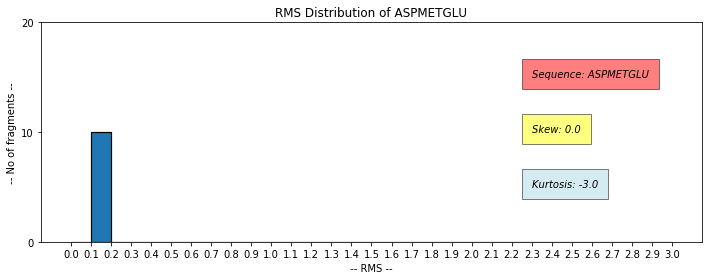

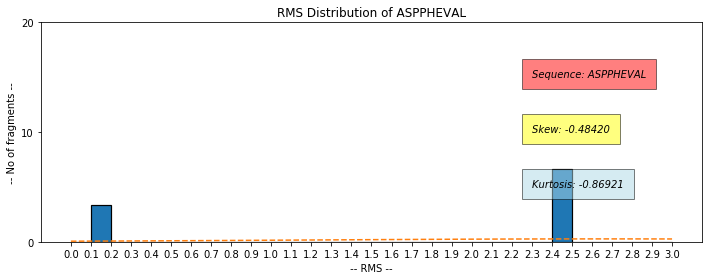

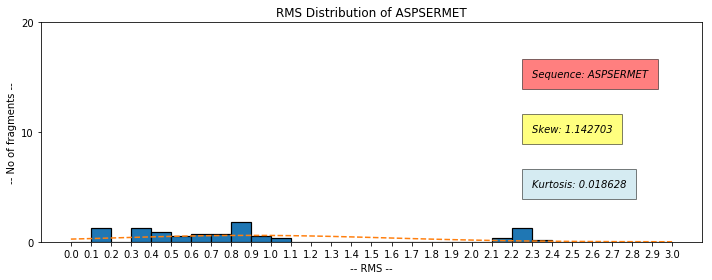

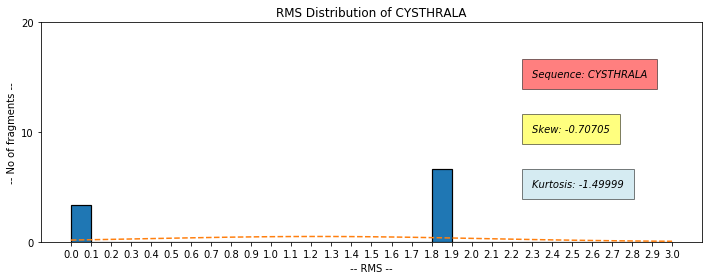

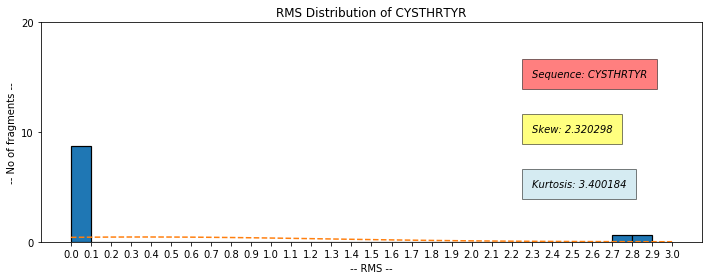

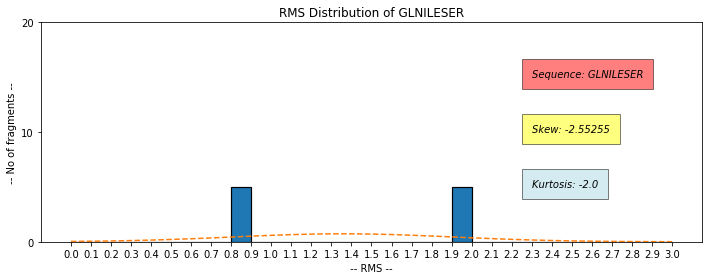

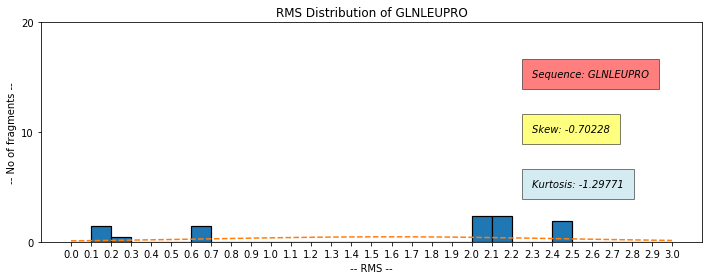

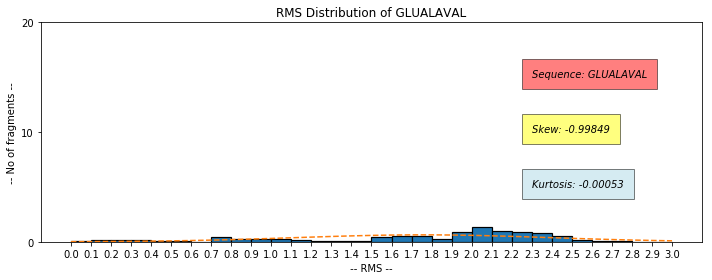

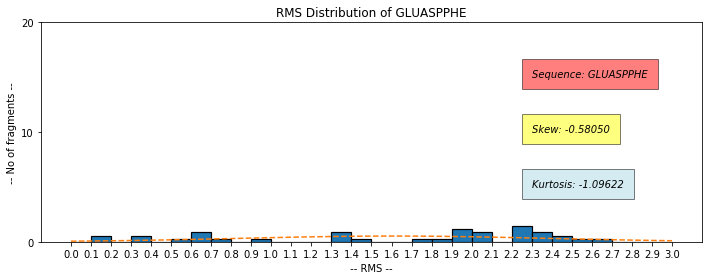

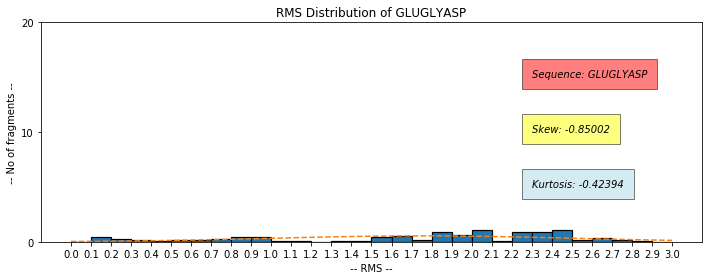

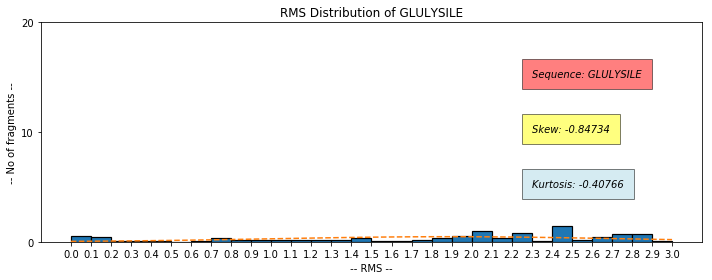

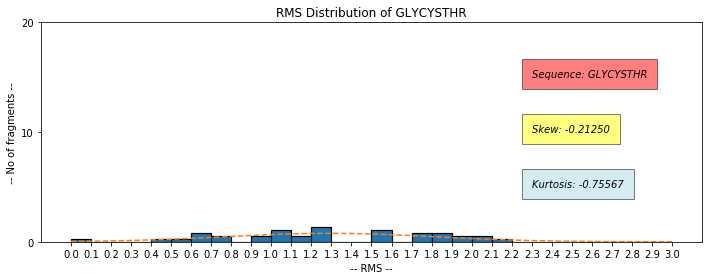

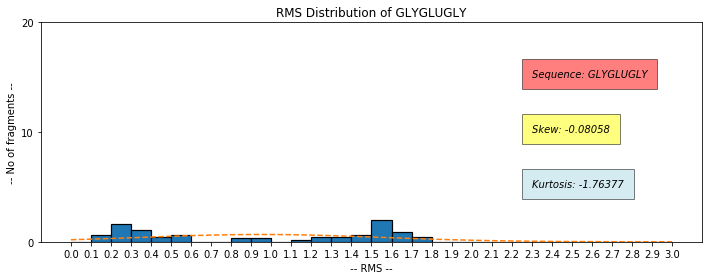

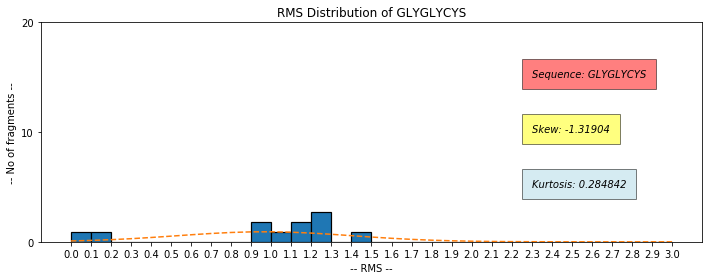

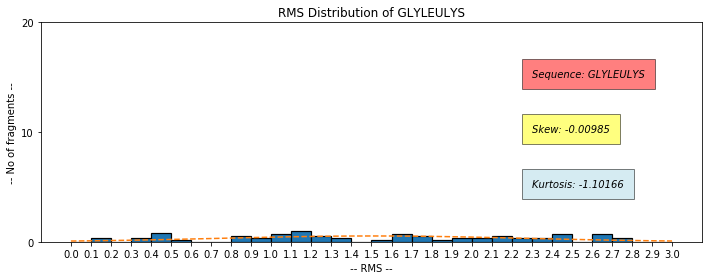

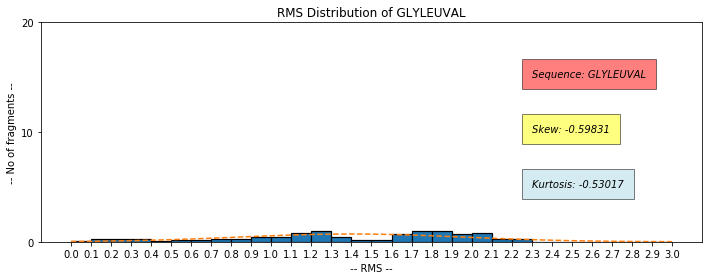

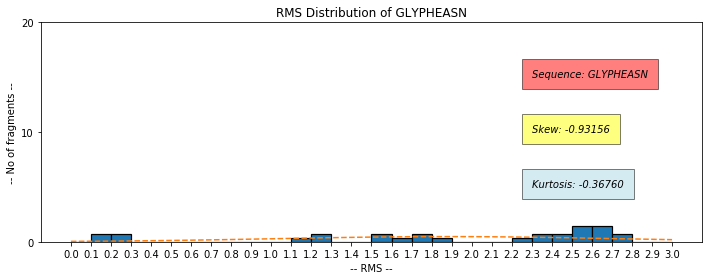

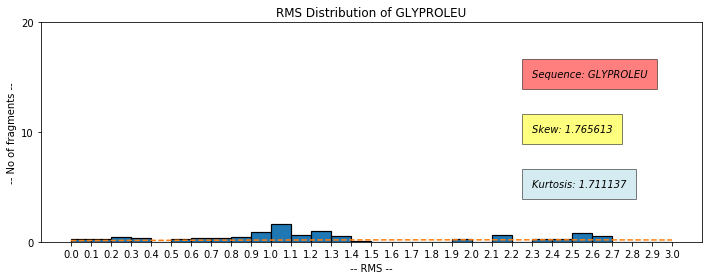

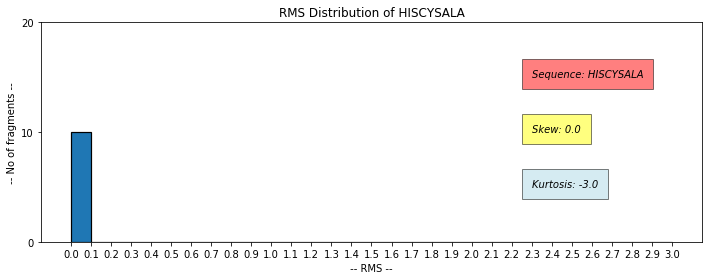

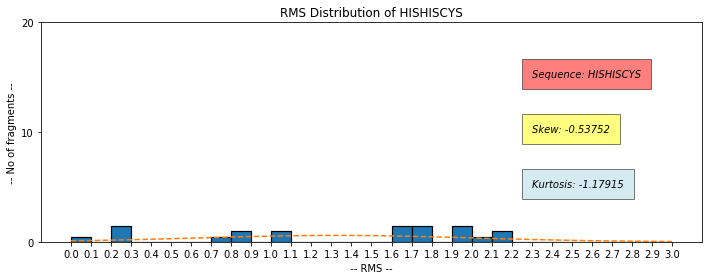

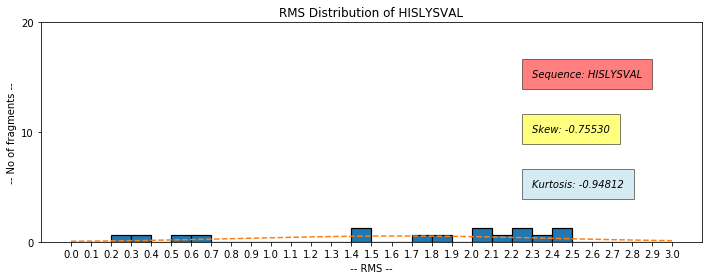

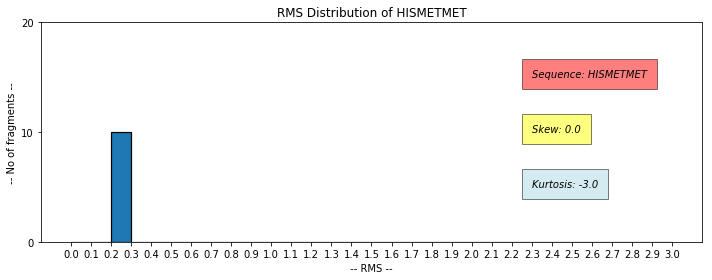

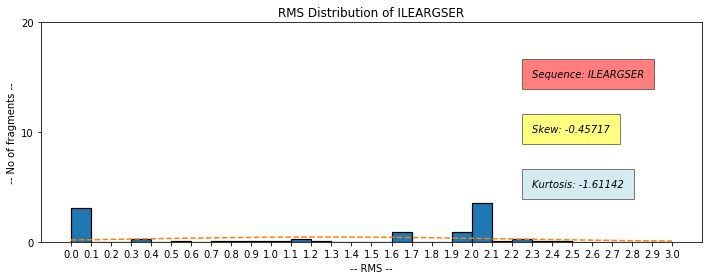

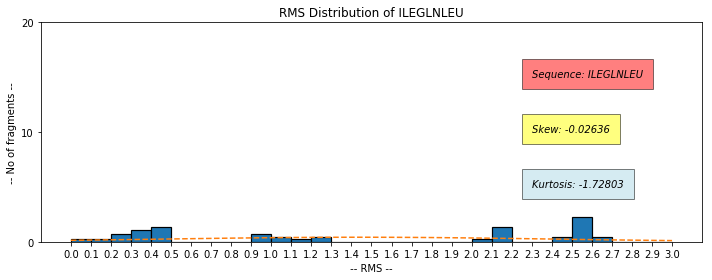

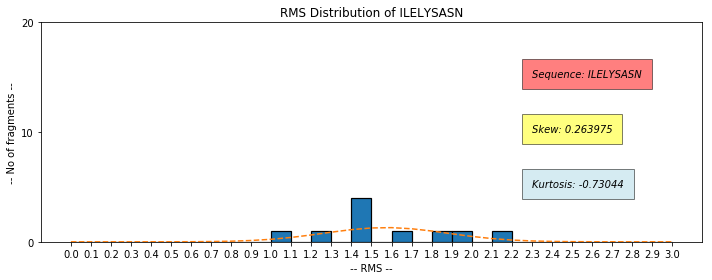

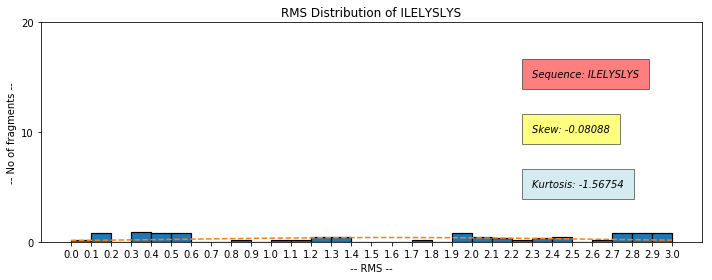

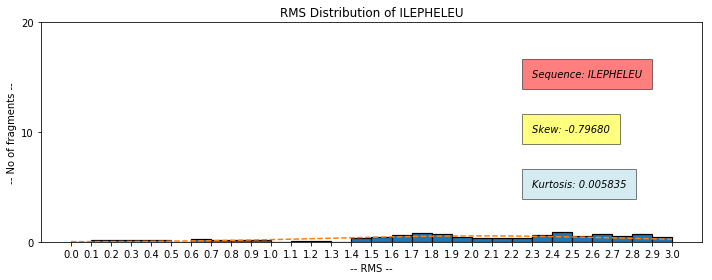

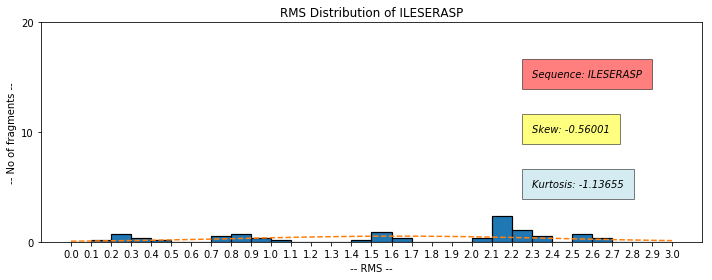

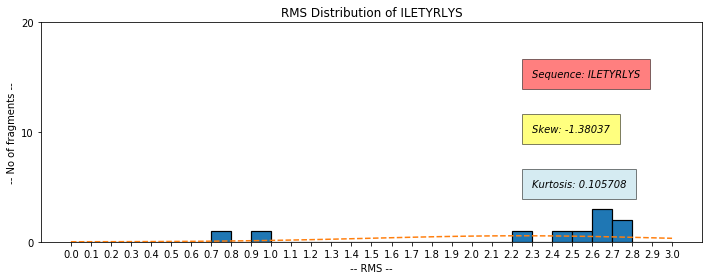

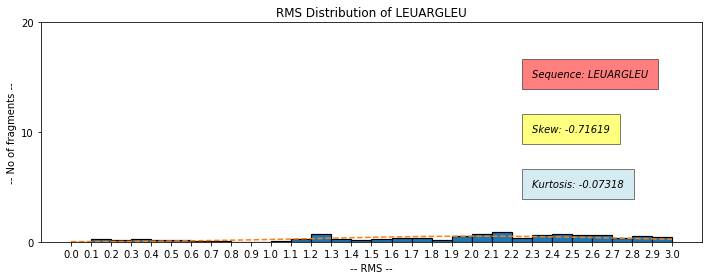

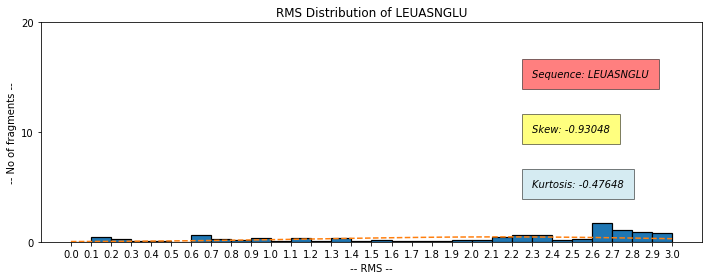

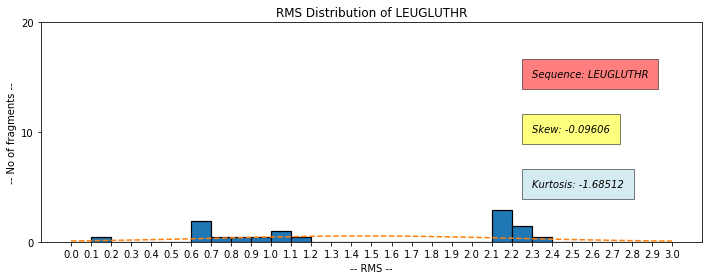

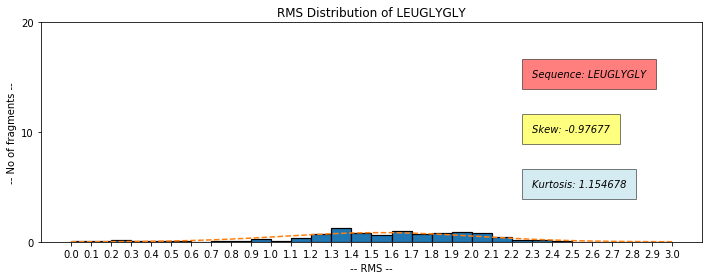

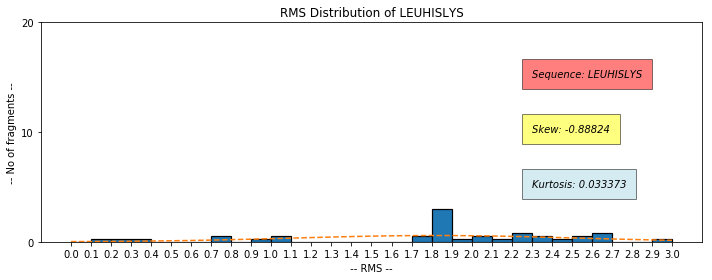

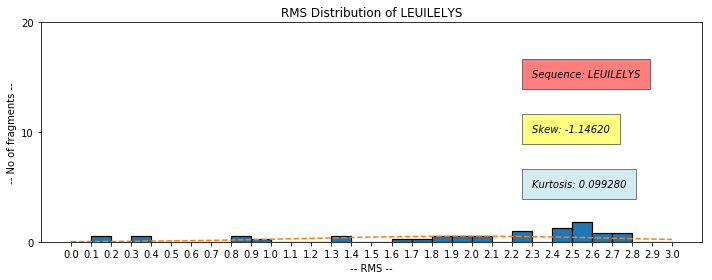

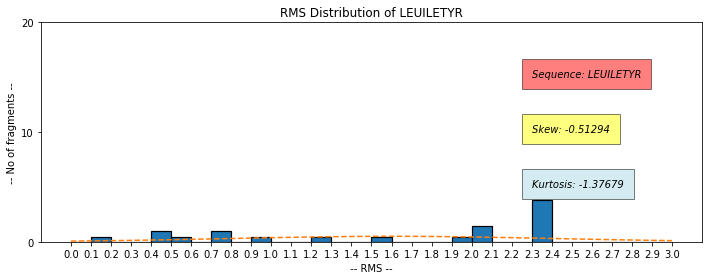

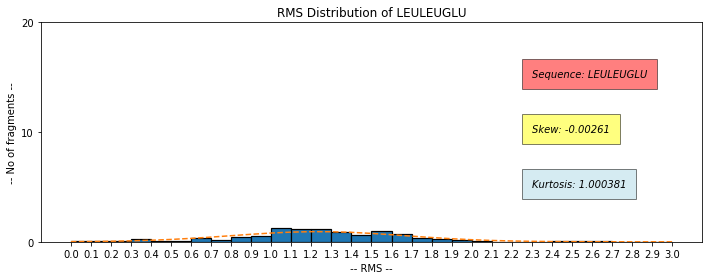

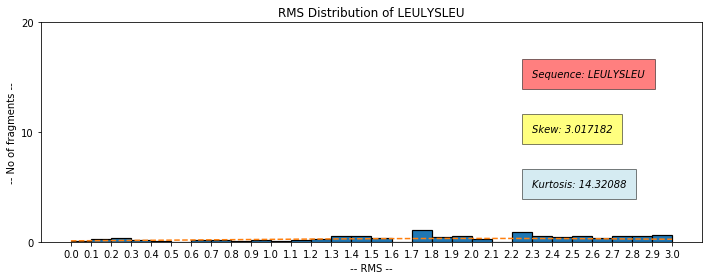

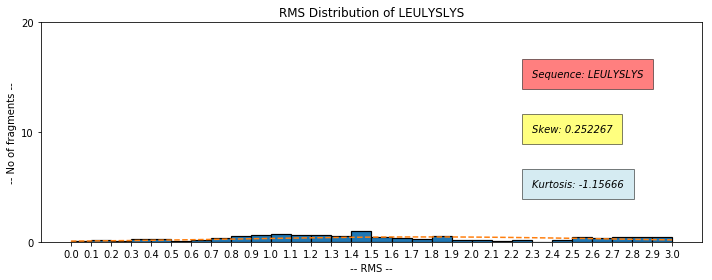

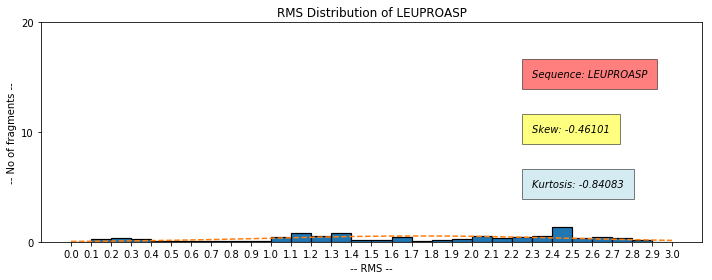

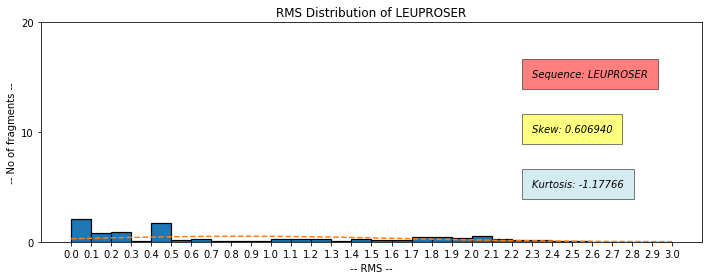

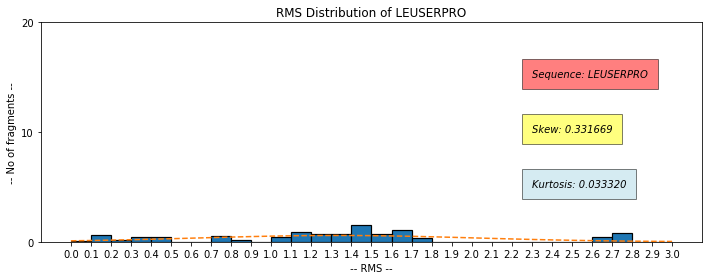

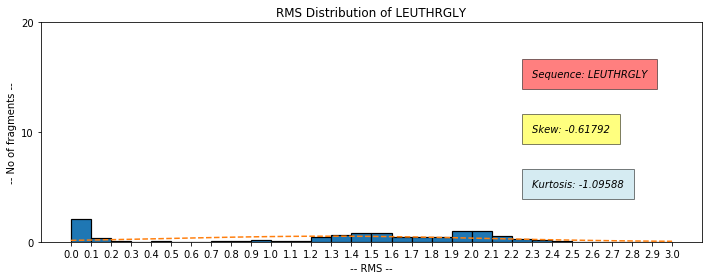

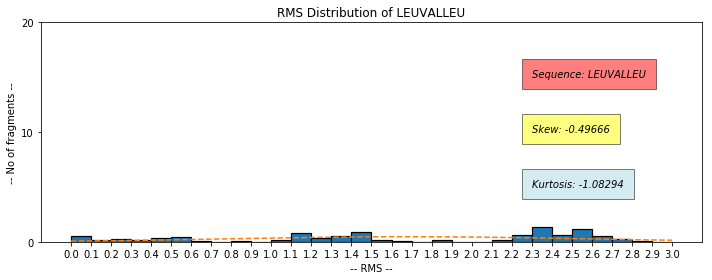

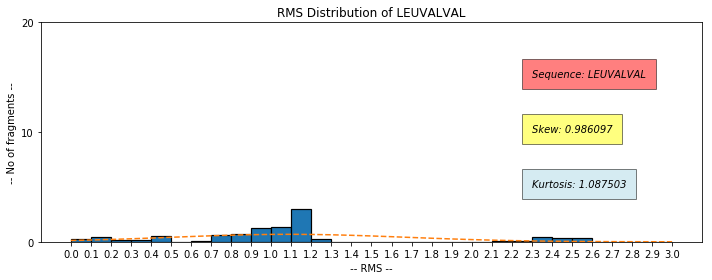

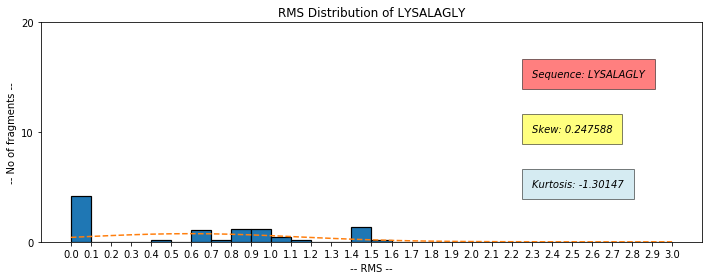

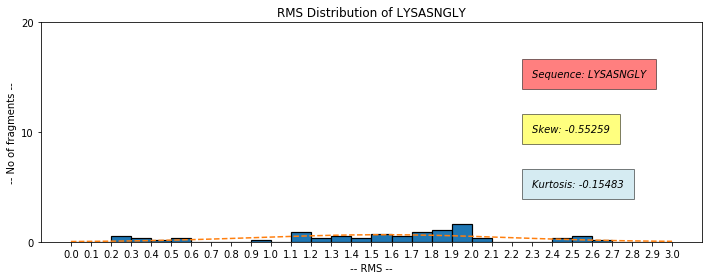

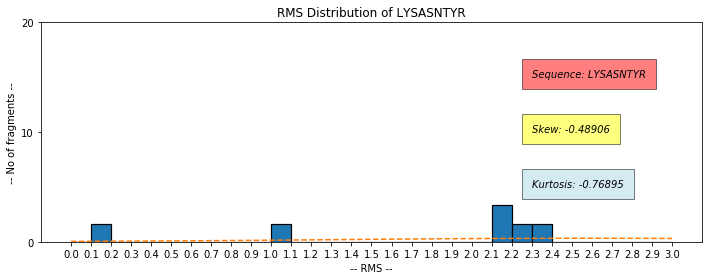

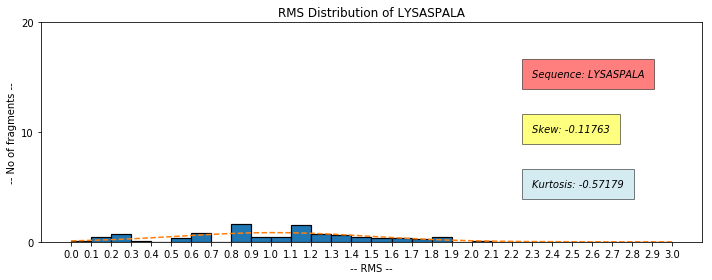

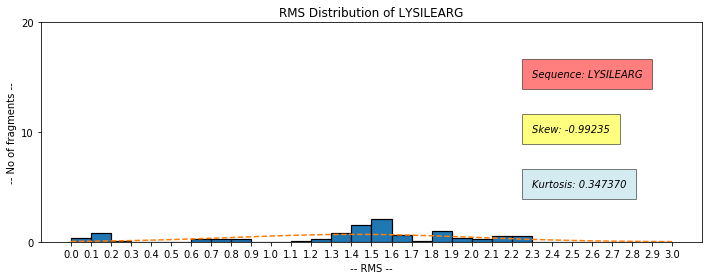

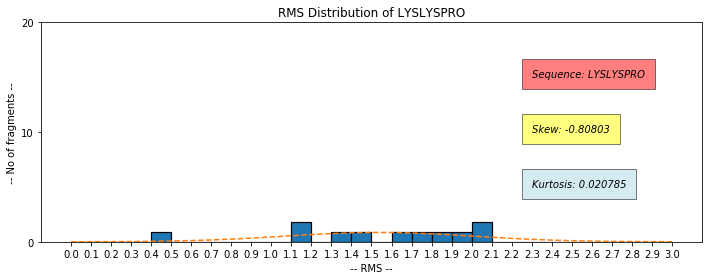

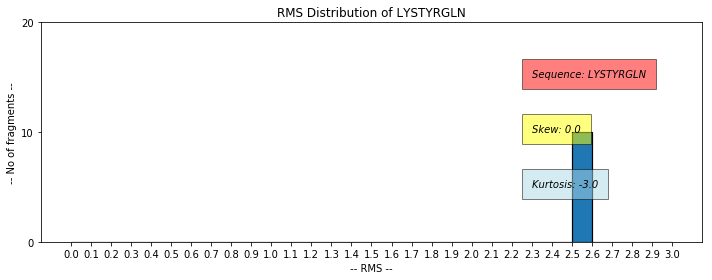

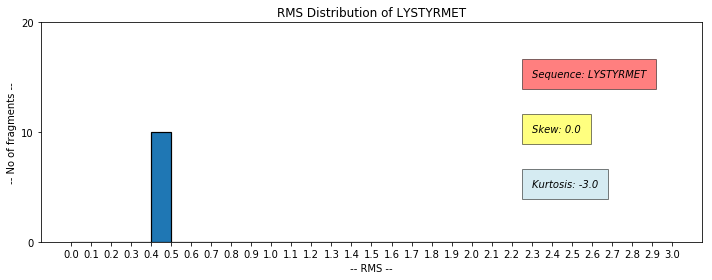

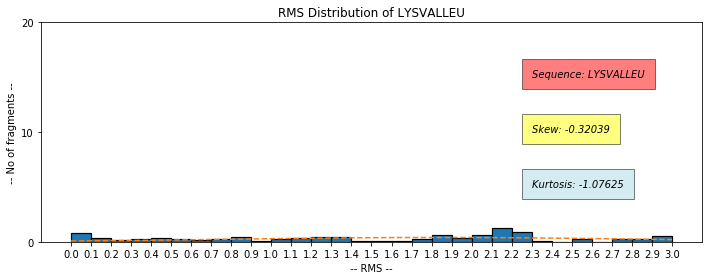

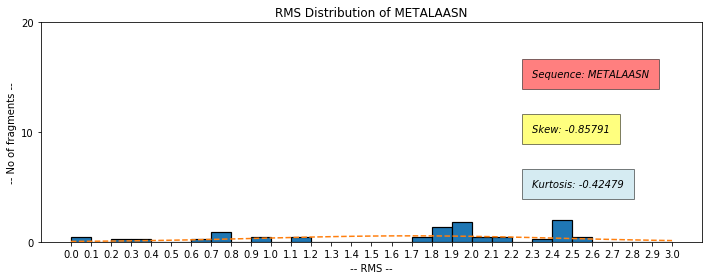

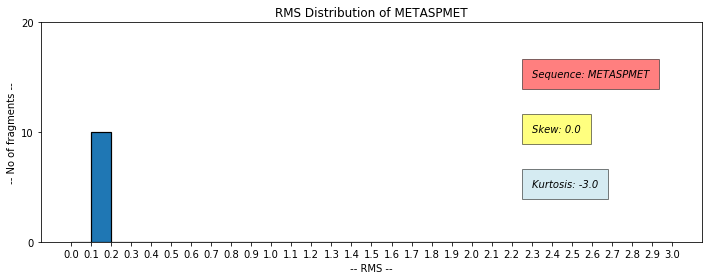

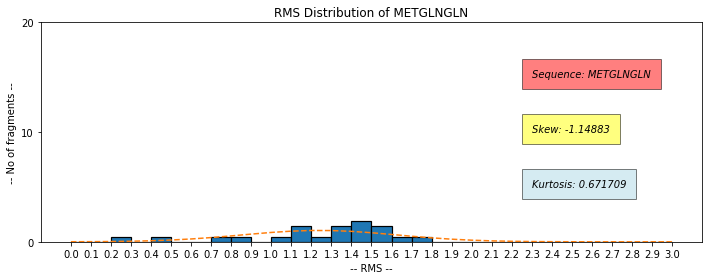

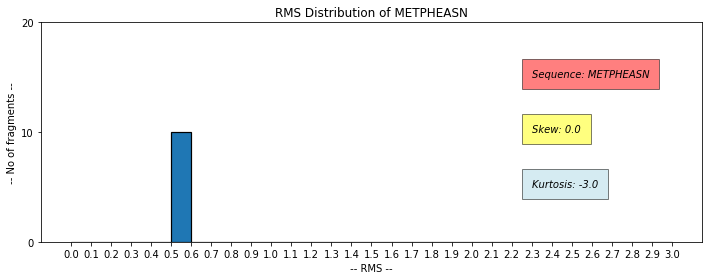

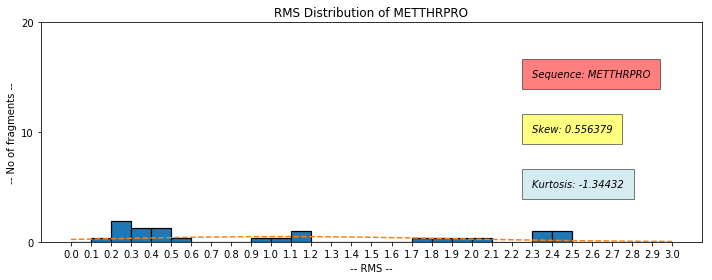

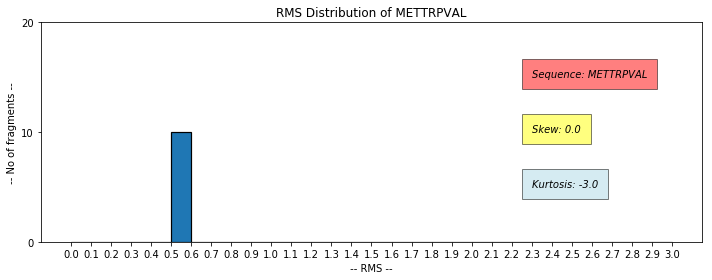

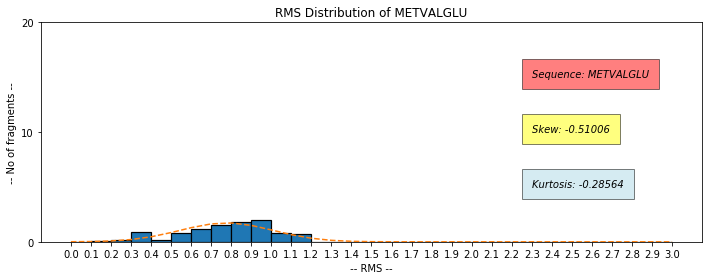

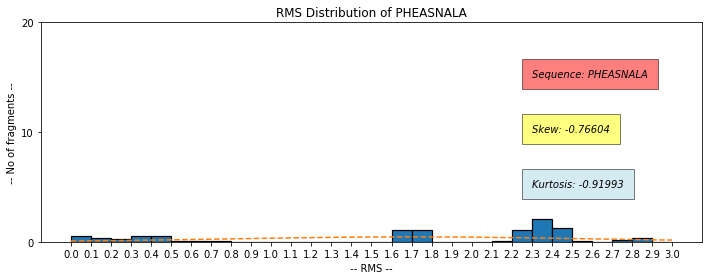

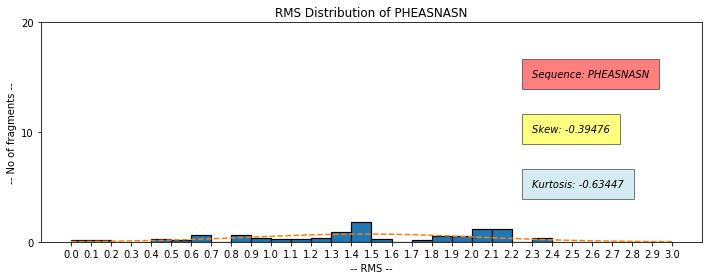

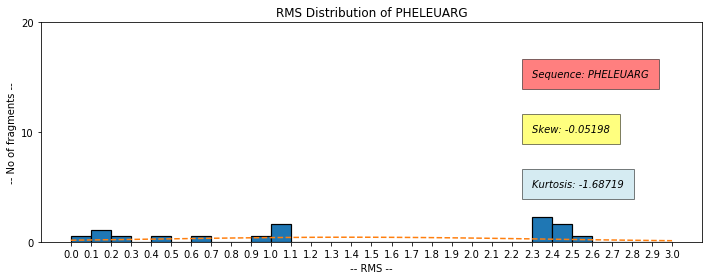

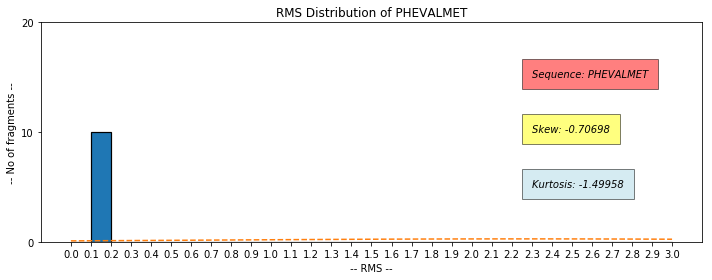

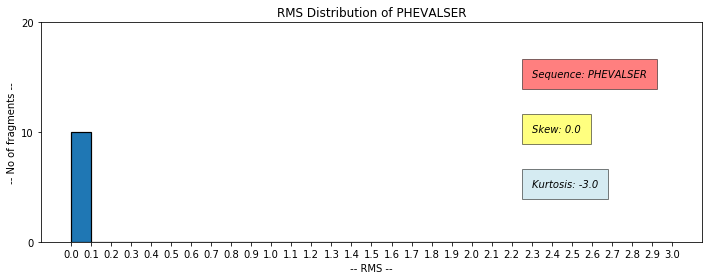

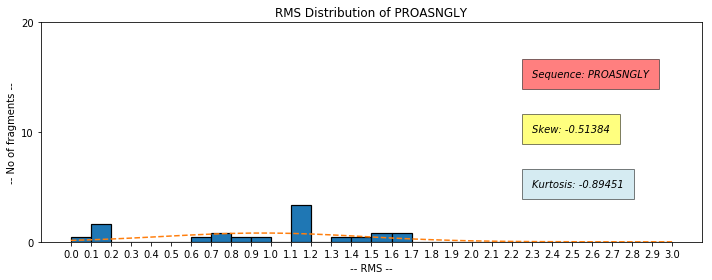

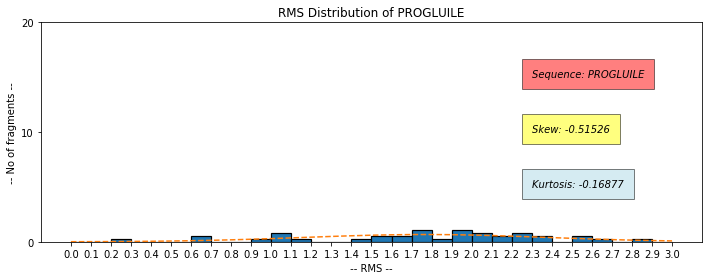

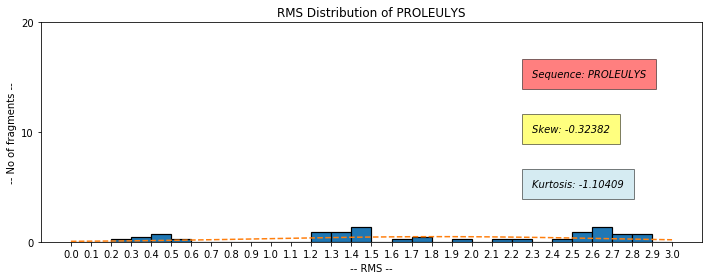

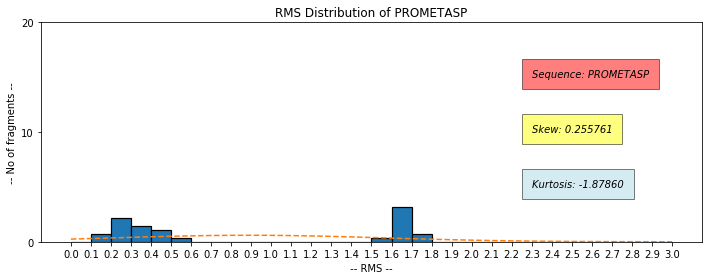

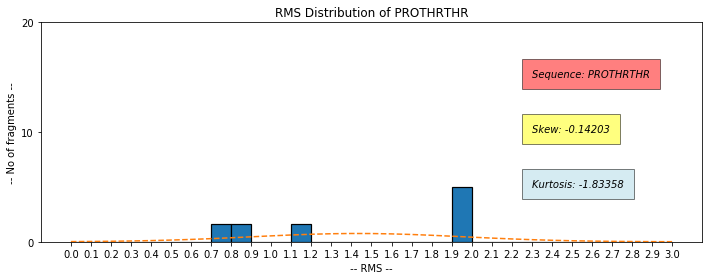

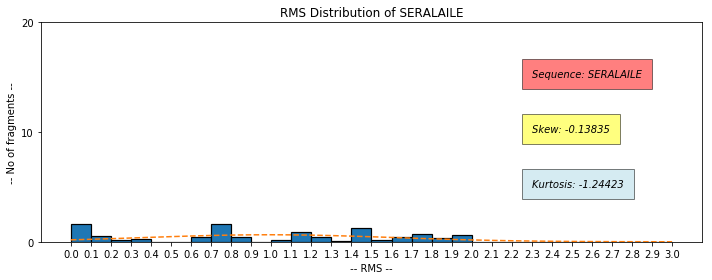

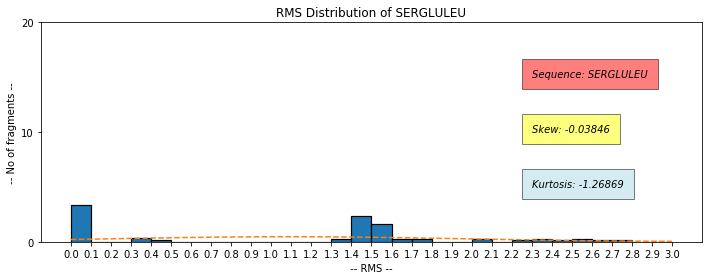

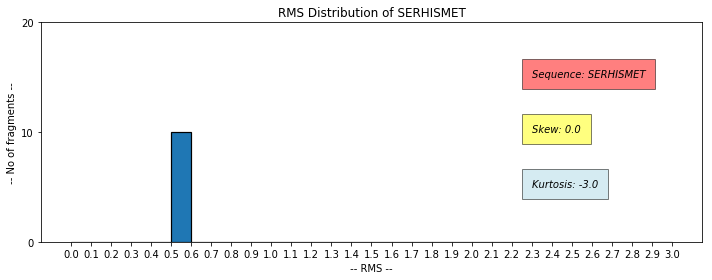

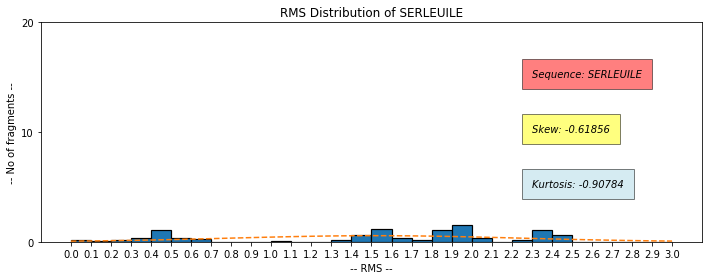

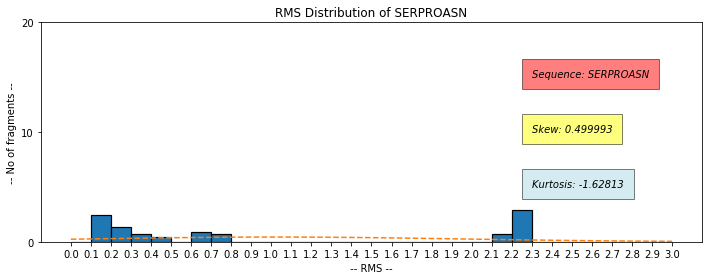

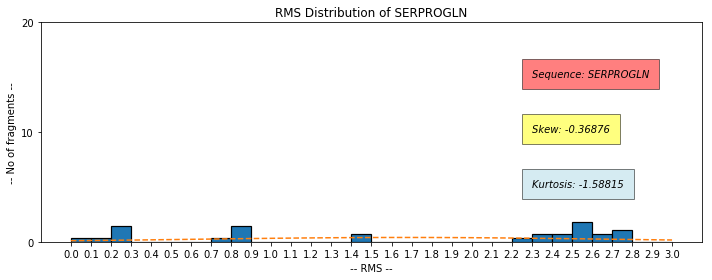

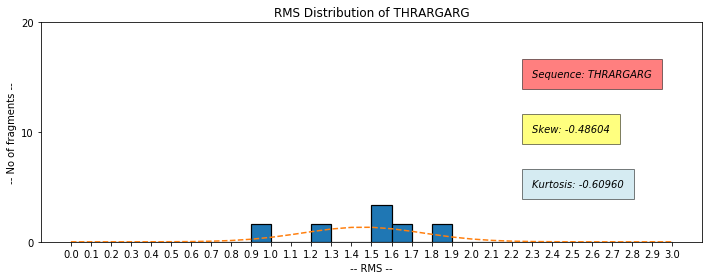

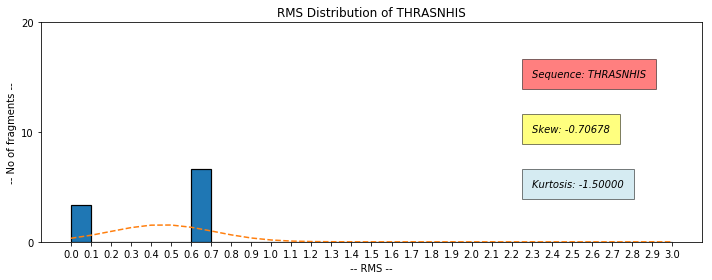

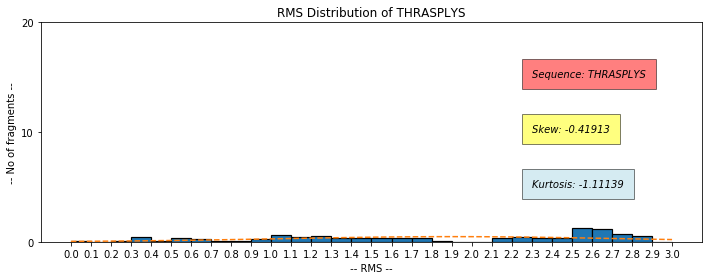

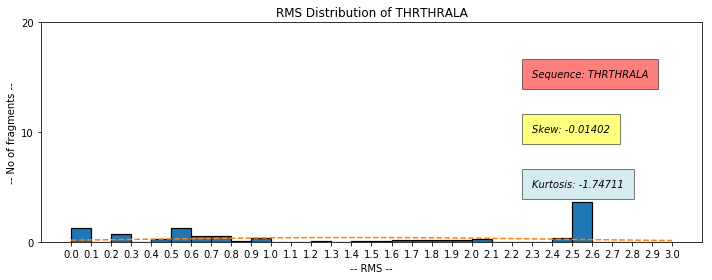

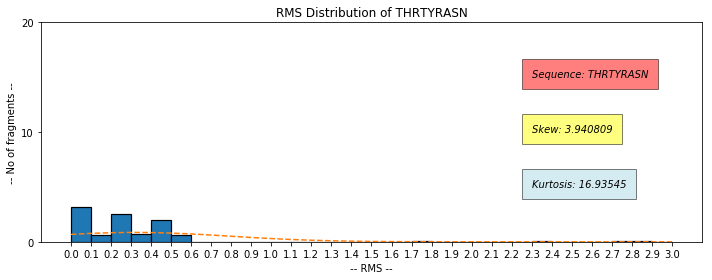

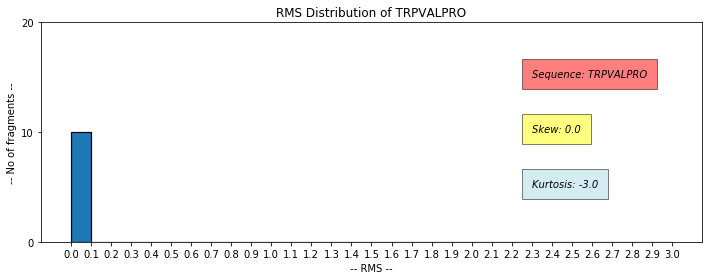

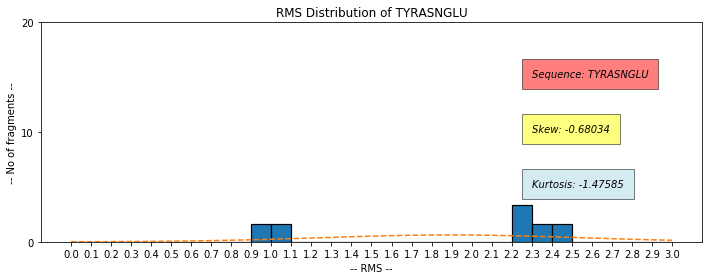

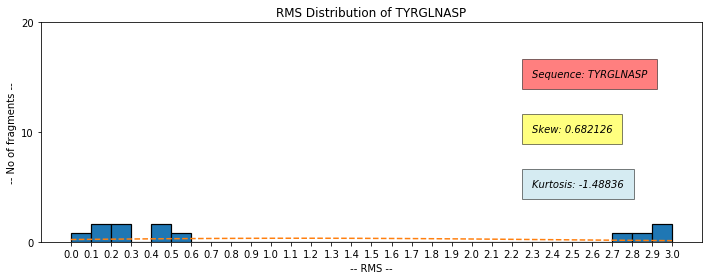

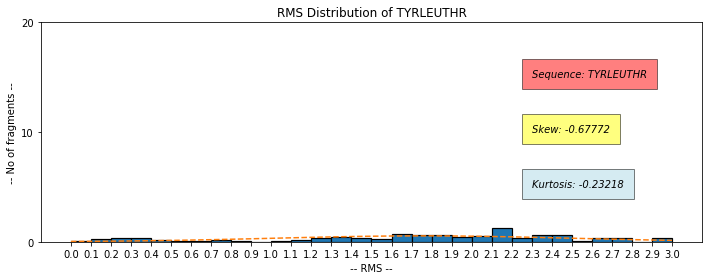

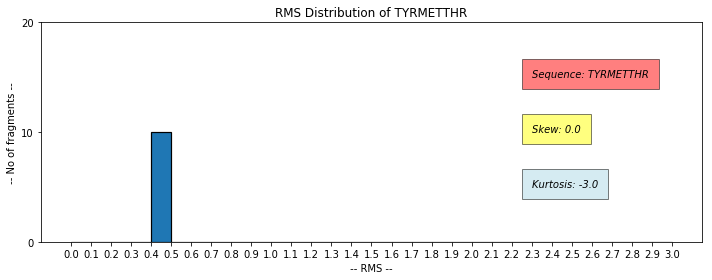

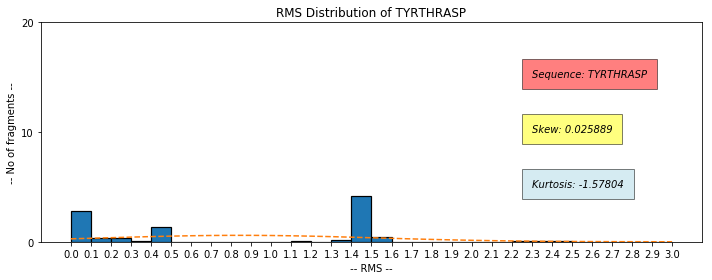

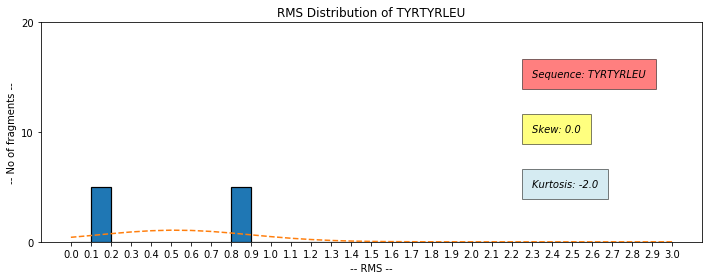

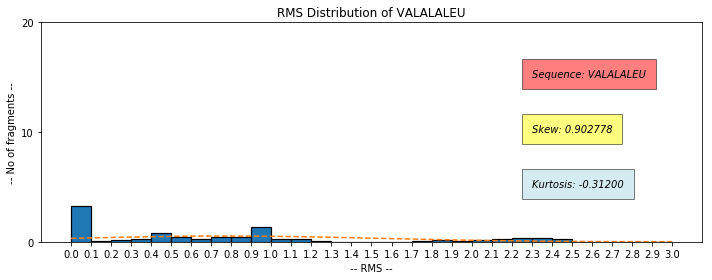

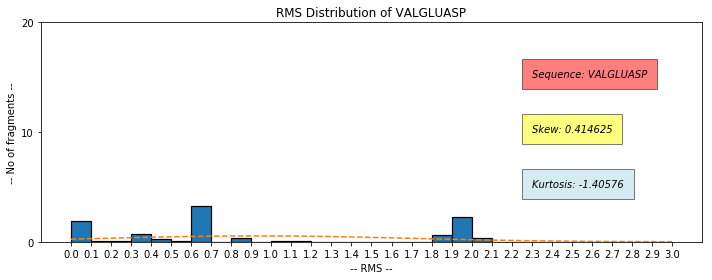

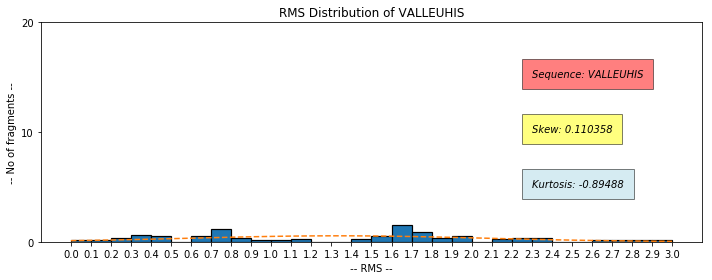

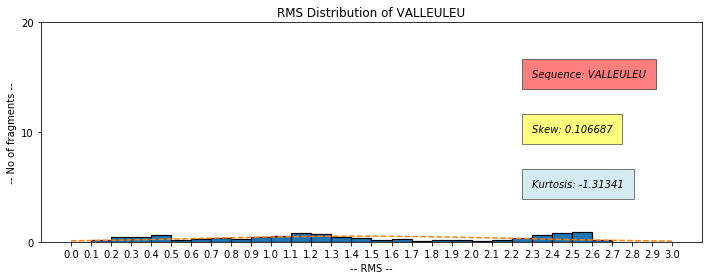

In [6]:
# example data
for index, row in id_rms_df.iterrows():
    mu = np.array(row['rms']).mean()  # mean of distribution
    sigma = np.array(row['rms']).std()  # standard deviation of distribution
    fig, ax = plt.subplots(figsize=(10,4))
    
    # the histogram of the data
    n, bins, patches = ax.hist(row['rms'], num_bins, density=1, edgecolor='black', linewidth=1.2)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    ax.set_xlabel(' -- RMS -- ')
    ax.set_ylabel(' -- No of fragments -- ')
    ax.set_title('RMS Distribution of ' + row['seq1'])
    ax.text(2.3, 15, 'Sequence: ' + row['seq1'], style='italic',
        bbox={'facecolor':'red', 'alpha': 0.5, 'pad':10})
    ax.text(2.3, 10, 'Skew: ' + str(skew(row['rms']))[:8], style='italic',
        bbox={'facecolor':'yellow', 'alpha': 0.5, 'pad':10})
    ax.text(2.3, 5, 'Kurtosis: ' + str(kurtosis(row['rms']))[:8], style='italic',
        bbox={'facecolor':'lightblue', 'alpha': 0.5, 'pad':10})
    ax.set_xticks(x_x)
    ax.set_yticks(y_y)
    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()
#     print('Sequence: ' + row['seq'])
#     print('Skew: ', skew(row['RMS Value']))
#     print('Kurtosis: ', kurtosis(row['RMS Value']))